Thứ năm 2/2/2023

Bài tập 1:

B1 Tạo 1 bộ số ngẫu nhiên  ${X_n}\sim {\rm N}(0,1);n = 1000$

B2 Vẽ Histogram. Vẽ plot $f(x) = \frac{1}{{\sqrt {2\pi } }}{e^{ - {x^2}/2}}$. Vẽ cả 2 plot này trên cùng một đồ thị

B3 Cho $Z = \frac{{\overline X  - {\mu _0}}}{{\sigma \sqrt n }}\sim N(0,1)\$

\$T = \frac{{\overline X  - {\mu _0}}}{{\sigma \sqrt n }}\sim t(n - 1)\$

Tạo 1 vector ngẫu nhiên \$({X_1},...{X_n})\$ với n = 20; \${X_k} \sim  N(\mu ,{\sigma ^2})\$

Bước 4 Tính \$Z = \frac{{\overline X  - \mu }}{{\sigma \sqrt n }}\$

Bước 5 lặp lại bước 3,4 1000 lần.

Bước 6 Vẽ Histogram B5



In [1]:
## Import thư viện
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
import scipy.stats as st
warnings.filterwarnings('ignore')

In [2]:
#Buoc 1
n=1000
X = np.random.normal(loc=0.0, scale=1.0, size=n)
X[:5]

array([-0.44672737, -0.12115422, -1.14047844, -1.28558103, -1.21544542])

1000


<AxesSubplot:ylabel='Density'>

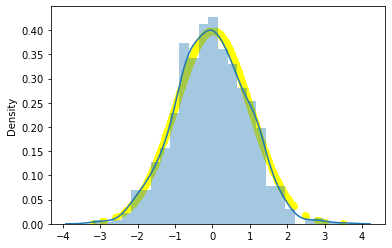

In [19]:
#Buoc 2
def fx(x):
  y = (1/np.sqrt(2*np.pi))*np.e**(-(x**2)/2)
  return y
y = fx(X)
print(len(y))
plt.scatter(X, y, color='yellow')
sns.distplot(X)

In [6]:
#Tinh Z-score, voi mu = 0
z = (np.mean(X) - 0)/1/(np.sqrt(n))
## Lam 1000 lan
def z_score(x):
  z = np.mean(x)/(1/np.sqrt(1000))
  return z
z

-0.0008744025518535443

In [7]:
z_list = []
for i in range(1000):
  z = z_score(X)
  z_list.append(z)
z_list[:3]

[-0.8744025518535443, -0.8744025518535443, -0.8744025518535443]

In [8]:
##lam lai voi scipy.stats.
mu_x = np.zeros(1000)
sig2_x = np.identity(1000)
x = st.multivariate_normal.rvs(mean = mu_x, cov = sig2_x)
y = fx(x)
##################
zlist =[]
for i in range(1000):
  x = st.multivariate_normal.rvs(mean = mu_x, cov = sig2_x)
  z = np.mean(x)/(1/np.sqrt(1000))
  zlist.append(z)
zlist[:3]

[-0.8454238637245824, 0.12946460084047776, -0.5666883406552994]

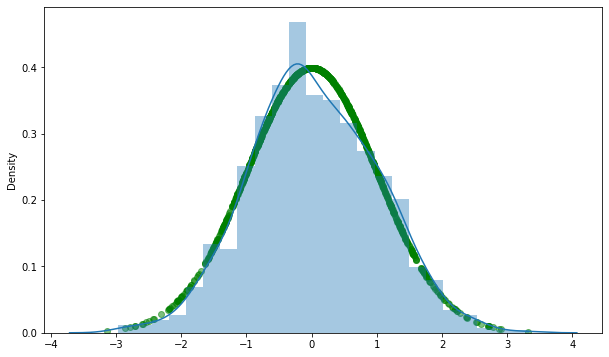

In [9]:
plt.figure(figsize = (10, 6))
plt.scatter(x,fx(x), alpha=0.5, color= 'g')
sns.distplot(zlist)
plt.show()

t-test

In [10]:
#Tinh t, voi mu = 0
#Tao 200 so ngau nhien theo t-distribution
tlist =[]
n=200
for i in range(200):
  x = st.multivariate_t.rvs(df=n-1, size = n)
  t = np.mean(x)/(np.std(x)/np.sqrt(n))
  tlist.append(t)
tlist[:3]

[-0.5919722776079647, -1.3272525436226013, -0.38026874349912604]

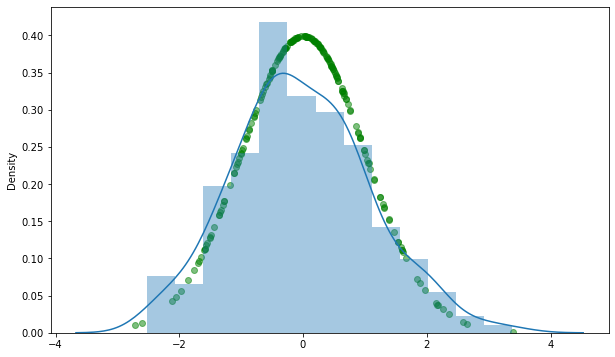

In [11]:
plt.figure(figsize = (10, 6))
plt.scatter(x,fx(x), alpha=0.5, color= 'g')
sns.distplot(tlist)
plt.show()

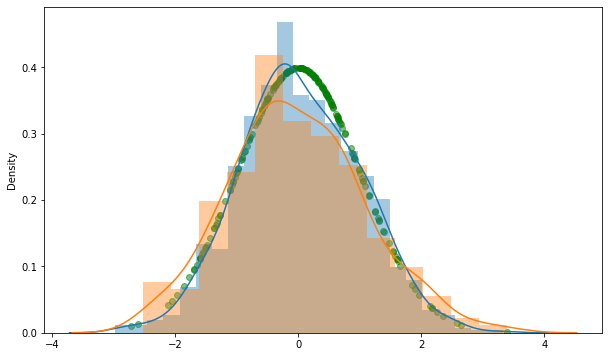

In [12]:
#So sanh thu giua z, t voi normal distribution cua X
plt.figure(figsize = (10, 6))
plt.scatter(x,fx(x), alpha=0.5, color= 'g')
sns.distplot(zlist)
sns.distplot(tlist)
plt.show()

Chi-square

[166.2028271688088, 148.4213814816155, 160.64114957481314]


<AxesSubplot:ylabel='Density'>

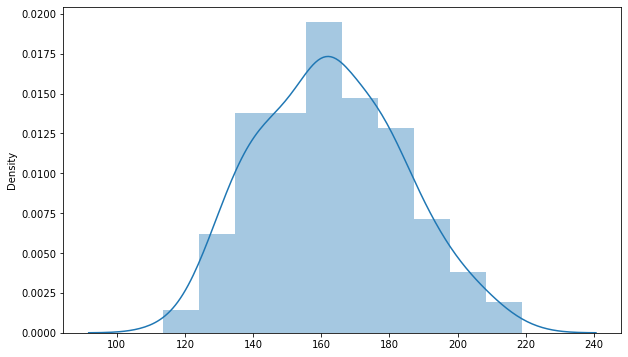

In [13]:
#Tạo 200 số ngẫu nhiên với pp chi bình phương n =10
chi_square_list =[]
n=10
for i in range(200):
  x = st.chi2.rvs(df=n-1, size = 200)
  chi2 = (n-1)*np.var(x)
  chi_square_list.append(chi2)
print(chi_square_list[:3])
plt.figure(figsize = (10, 6))
sns.distplot(chi_square_list)

F distribution
https://www.sciencedirect.com/topics/mathematics/f-distribution

$F = \frac{{s_1^2/\sigma _1^2}}{{s_2^2/\sigma _2^2}}$
Vẽ F distribution với n1,n3 và n2,n3

In [14]:
#Tạo 3 bộ dữ liệu, mỗi bộ có 200 số ngẫu nhiên theo phân phối chi-square,
#với n1 = 10 n2 = 15 n3 = 18
n1= 10
n2= 15
n3 = 18
chi_square_list =[]
chi_square_list2 =[]
chi_square_list3 =[]
F13 = []
F23 = []
for i in range(200):
  x1 = st.chi2.rvs(df=n1-1, size = 200)
  chi21 = (n1-1)*np.var(x1)
  chi_square_list.append(chi21)
  ###
  x2 = st.chi2.rvs(df=n2-1, size = 200)
  chi22 = (n2-1)*np.var(x2)
  chi_square_list2.append(chi22)
  ###
  x3 = st.chi2.rvs(df=n3-1, size = 200)
  chi23 = (n3-1)*np.var(x3)
  chi_square_list3.append(chi23)
  ###
  f13 = np.var(x1)/np.var(x3)
  f23 = np.var(x2)/np.var(x3)
  F13.append(f13)
  F23.append(f23)

print(chi_square_list[:3])  
print(chi_square_list2[:3])  
print(chi_square_list3[:3])
print(F13[:3])
print(F23[:3])

[172.53363285365458, 120.71936555634524, 139.55598677332426]
[359.44269536175153, 397.7998077844928, 440.54708124166564]
[557.865916169264, 434.4882462141756, 549.8779984657073]
[0.5841849315598295, 0.5248138937242832, 0.4793895255485413]
[0.7823853679379422, 1.1117507273147333, 0.9728522121537189]


<function matplotlib.pyplot.show(close=None, block=None)>

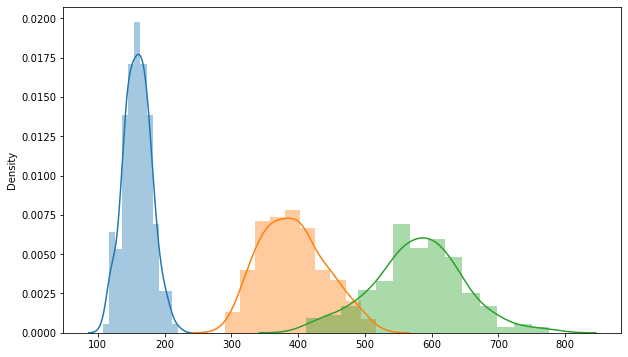

In [15]:
plt.figure(figsize = (10, 6))
sns.distplot(chi_square_list)
sns.distplot(chi_square_list2)
sns.distplot(chi_square_list3)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

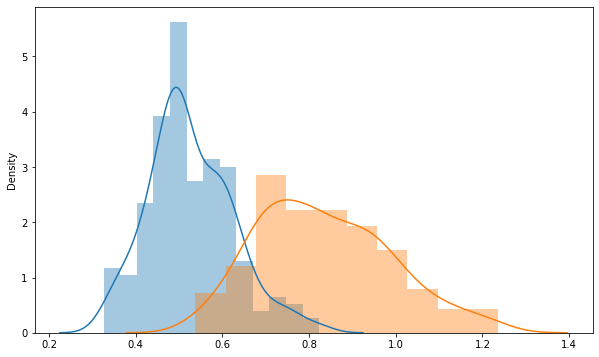

In [16]:
plt.figure(figsize = (10, 6))
sns.distplot(F13)
sns.distplot(F23)
plt.show